# CNN 이진분류(컬러 이미지)
* dataset : 개와 고양이 데이터셋
> kaggle

In [9]:
!pip install --q ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 7.46 s (started: 2024-07-01 06:30:51 +00:00)


In [10]:
# cats_and_dogs 파일 삭제
#!rm -rf cats_and_dogs

time: 387 µs (started: 2024-07-01 06:30:58 +00:00)


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

time: 608 µs (started: 2024-07-01 06:30:58 +00:00)


## 1. 데이터 준비

In [12]:
# !wget : 대용량 등 다운로드가 안되는 것도 있음
# google drive 대용량 파일 down - gdown이 존재함(코랩에 설치되어 있음) -> !pip install gdown
# zip 파일이 생김 - 쓸 수 있을만큼만
!gdown https://drive.google.com/uc?id=1dC-Kso5FonYWtbxtJnJ8_dxO_Jlo8weR

Downloading...
From (original): https://drive.google.com/uc?id=1dC-Kso5FonYWtbxtJnJ8_dxO_Jlo8weR
From (redirected): https://drive.google.com/uc?id=1dC-Kso5FonYWtbxtJnJ8_dxO_Jlo8weR&confirm=t&uuid=4a8c3629-e6fa-4599-ae5f-a503df69c2ae
To: /content/cats_and_dogs.zip
100% 68.6M/68.6M [00:00<00:00, 239MB/s]
time: 1.51 s (started: 2024-07-01 06:30:58 +00:00)


In [13]:
!unzip /content/cats_and_dogs.zip

Archive:  /content/cats_and_dogs.zip
   creating: cats_and_dogs/
   creating: cats_and_dogs/test/
   creating: cats_and_dogs/test/cats/
  inflating: cats_and_dogs/test/cats/cat.2300.jpg  
  inflating: cats_and_dogs/test/cats/cat.2301.jpg  
  inflating: cats_and_dogs/test/cats/cat.2302.jpg  
  inflating: cats_and_dogs/test/cats/cat.2303.jpg  
  inflating: cats_and_dogs/test/cats/cat.2304.jpg  
  inflating: cats_and_dogs/test/cats/cat.2305.jpg  
  inflating: cats_and_dogs/test/cats/cat.2306.jpg  
  inflating: cats_and_dogs/test/cats/cat.2307.jpg  
  inflating: cats_and_dogs/test/cats/cat.2308.jpg  
  inflating: cats_and_dogs/test/cats/cat.2309.jpg  
  inflating: cats_and_dogs/test/cats/cat.2310.jpg  
  inflating: cats_and_dogs/test/cats/cat.2311.jpg  
  inflating: cats_and_dogs/test/cats/cat.2312.jpg  
  inflating: cats_and_dogs/test/cats/cat.2313.jpg  
  inflating: cats_and_dogs/test/cats/cat.2314.jpg  
  inflating: cats_and_dogs/test/cats/cat.2315.jpg  
  inflating: cats_and_dogs/test/

In [14]:
# hard disk 이미지 데이터 저장
# load해서 사용하려면 폴더 구조를 test, train(아래 cats, dogs)와 같이 만드는 것이 기본

# 루트 지정
data_root = '/content/cats_and_dogs'
train_dir = data_root + '/train'
test_dir = data_root + '/test'

print(train_dir)
print(test_dir)

/content/cats_and_dogs/train
/content/cats_and_dogs/test
time: 1.39 ms (started: 2024-07-01 06:31:02 +00:00)


### 데이터 로딩

In [15]:
# opencv : 이미지 복잡한 계산
# pillow : 단순한 것
class_name = ['cats', 'dogs']

time: 418 µs (started: 2024-07-01 06:31:02 +00:00)


In [16]:
import os
# 하나하나씩 로딩
train_cats_fnames = os.listdir(train_dir + '/cats')
train_dogs_fnames = os.listdir(train_dir + '/dogs')
print(train_cats_fnames[:5])
print(train_dogs_fnames[:5])

['cat.693.jpg', 'cat.2017.jpg', 'cat.697.jpg', 'cat.257.jpg', 'cat.849.jpg']
['dog.2366.jpg', 'dog.2492.jpg', 'dog.2304.jpg', 'dog.74.jpg', 'dog.2476.jpg']
time: 6.34 ms (started: 2024-07-01 06:31:02 +00:00)


In [17]:
import PIL

X_train = []
y_train = []

# padding을 채워서 정사각형으로 만들어서 사이즈를 바꾸면 적어도 이미지가 찌글어지지 않음
# 까만색으로 채움
# resizing : 244로 바꿈
for fname in train_cats_fnames:
  image = PIL.Image.open(train_dir + '/cats/' + fname)
  image = image.resize((244, 244)) # 튜플 형태
  arr = np.array(image) # numpy array 로 변경
  X_train.append(arr)
  y_train.append(0) # 정답을 맞춰야 함(고양이는 0)

len(X_train), len(y_train)

(1300, 1300)

time: 13.2 s (started: 2024-07-01 06:31:02 +00:00)


In [18]:
for fname in train_dogs_fnames:
  image = PIL.Image.open(train_dir + '/dogs/' + fname)
  image = image.resize((244, 244)) # 튜플 형태
  arr = np.array(image) # numpy array 로 변경
  X_train.append(arr)
  y_train.append(1) # 정답을 맞춰야 함(강아지는 1)

len(X_train), len(y_train)

(2600, 2600)

time: 14.4 s (started: 2024-07-01 06:31:15 +00:00)


In [19]:
# 앞으로 다루기 위해서 numpy로 변경
X_train = np.array(X_train)
y_train = np.array(y_train)

print(type(X_train), type(y_train))
print(X_train.shape, y_train.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(2600, 244, 244, 3) (2600,)
time: 342 ms (started: 2024-07-01 06:31:29 +00:00)


## 2. 학습, 검증 데이터 분리

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, shuffle = True, random_state = 42)

print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(2080, 244, 244, 3) (520, 244, 244, 3)
(2080,) (520,)
time: 929 ms (started: 2024-07-01 06:31:30 +00:00)


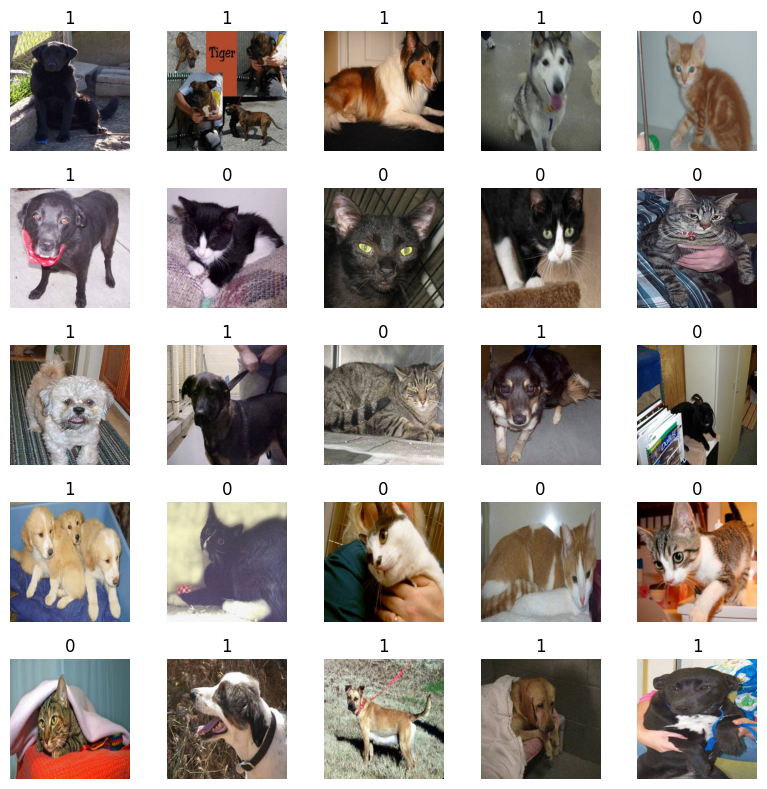

time: 6.84 s (started: 2024-07-01 06:31:31 +00:00)


In [21]:
sample = np.random.randint(2080, size = 25)

# sample 25개를 그리기
fig = plt.figure(figsize = (8, 8))
for i, idx in enumerate(sample):
    plt.subplot(5, 5, i+1) # 5*5, 1번부터
    plt.imshow(X_train[idx], cmap = 'gray') # color map
    plt.axis('off') # 축을 지움
    plt.title(y_train[idx]) # 정답값 - 이름으로 출력
fig.tight_layout() # 보기 좋게 변경
plt.show()

## 3. 전처리

In [22]:
X_train_s = X_train.astype('float') / 255.0
X_val_s = X_val.astype('float') / 255.0

time: 2.49 s (started: 2024-07-01 06:31:38 +00:00)


## 4. 모델

In [23]:
from keras import layers

# add를 통해서 분기 가능
model = keras.Sequential()
model.add(layers.Conv2D(filters=16, kernel_size=3, activation = 'relu', input_shape = (244, 244, 3)))
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(filters=32, kernel_size=3, activation="relu"))
model.add(layers.MaxPool2D())
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(filters=64, kernel_size=3, activation="relu"))
model.add(layers.MaxPool2D())
model.add(layers.Flatten())
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

time: 241 ms (started: 2024-07-01 06:31:40 +00:00)


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 242, 242, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 121, 121, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 59, 59, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 59, 59, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 57, 57, 64)        1

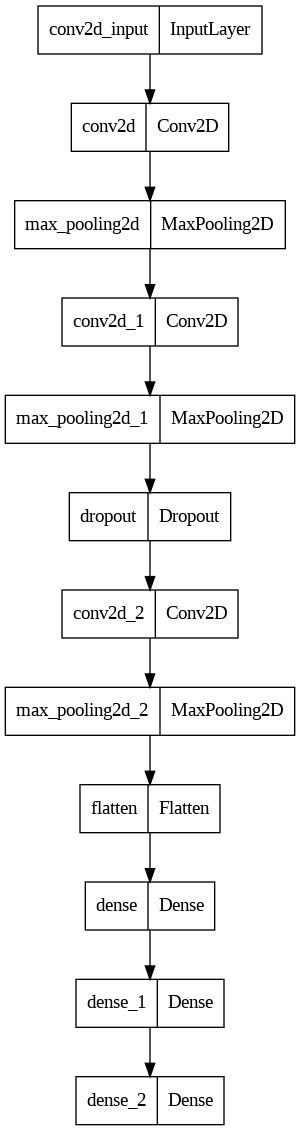

time: 275 ms (started: 2024-07-01 06:31:40 +00:00)


In [25]:
keras.utils.plot_model(model)

In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

time: 26.4 ms (started: 2024-07-01 06:31:41 +00:00)


In [27]:
from keras import callbacks

es = callbacks.EarlyStopping(monitor='val_loss', patience=5)
# 갱신된 값을 파일로 저장할 수 있음 - 각 epochs마다 or 기타 등 옵션을 줄 수 있음
ckpt_path = './temp/cats_dogs.ckpt'
ckpt = keras.callbacks.ModelCheckpoint(
    ckpt_path,
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True # 가중치만 저장할지 - False: layer + 가중치 정보
    )

time: 1.44 ms (started: 2024-07-01 06:31:41 +00:00)


In [28]:
EPOCHS = 20
BATCH_SIZE = 32

history = model.fit(X_train_s, y_train,
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    callbacks = [es, ckpt],
                    validation_data = (X_val_s, y_val))

Epoch 1/20
65/65 [==============================] - 154s 2s/step - loss: 0.7828 - accuracy: 0.5063 - val_loss: 0.6932 - val_accuracy: 0.4885
Epoch 2/20
65/65 [==============================] - 133s 2s/step - loss: 0.6793 - accuracy: 0.5899 - val_loss: 0.6781 - val_accuracy: 0.6212
Epoch 3/20
65/65 [==============================] - 147s 2s/step - loss: 0.6495 - accuracy: 0.6361 - val_loss: 0.6643 - val_accuracy: 0.6038
Epoch 4/20
65/65 [==============================] - 135s 2s/step - loss: 0.5783 - accuracy: 0.7139 - val_loss: 0.7131 - val_accuracy: 0.5962
Epoch 5/20
65/65 [==============================] - 139s 2s/step - loss: 0.5098 - accuracy: 0.7519 - val_loss: 0.7256 - val_accuracy: 0.6346
Epoch 6/20
65/65 [==============================] - 129s 2s/step - loss: 0.4220 - accuracy: 0.8183 - val_loss: 0.6948 - val_accuracy: 0.6654
Epoch 7/20
65/65 [==============================] - 133s 2s/step - loss: 0.3105 - accuracy: 0.8721 - val_loss: 0.9165 - val_accuracy: 0.6865
Epoch 8/20
65

In [29]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()

time: 1.67 ms (started: 2024-07-01 06:50:06 +00:00)


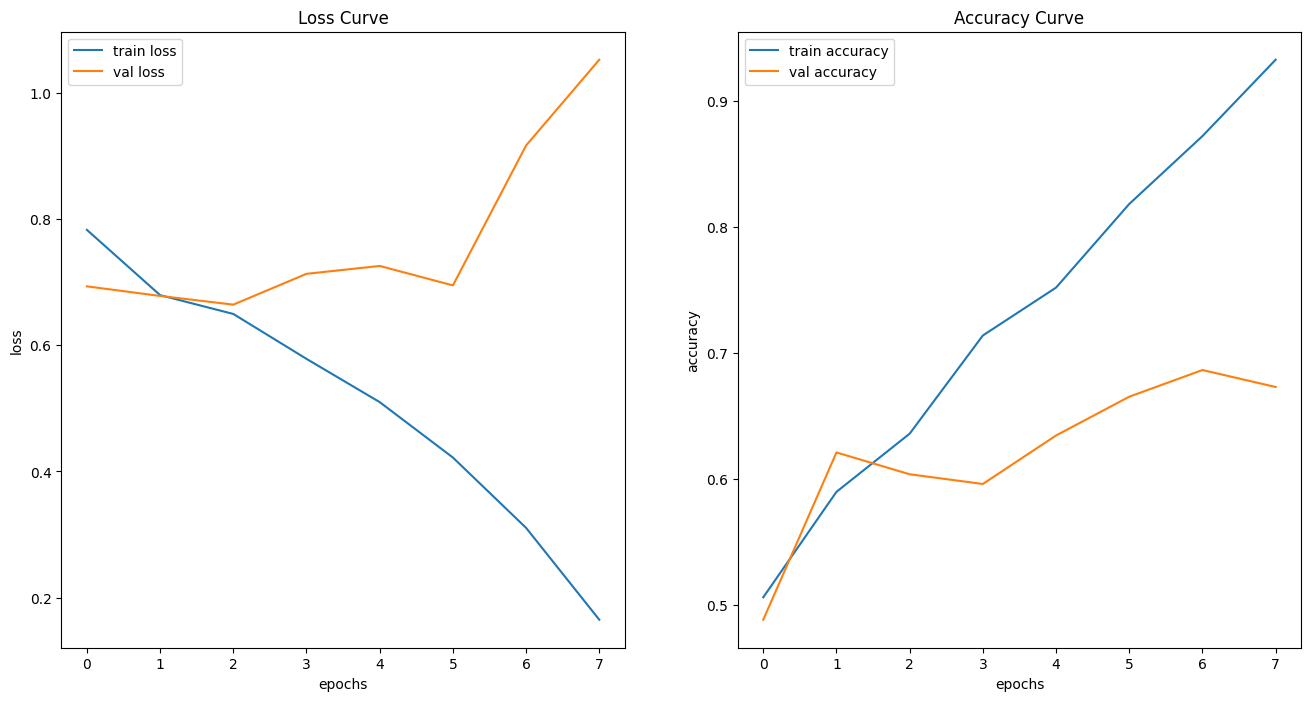

time: 582 ms (started: 2024-07-01 06:50:06 +00:00)


In [30]:
plot_history(history)

In [31]:
# 이 모델이 베스트인 상태임
# 베스트 체크포인트 로딩...
model.load_weights(ckpt_path)

time: 649 ms (started: 2024-07-01 06:50:06 +00:00)


## 5. 검증

In [32]:
import os
# 하나하나씩 로딩
test_cats_fnames = os.listdir(test_dir + '/cats')
test_dogs_fnames = os.listdir(test_dir + '/dogs')
print(test_cats_fnames[:5])
print(test_dogs_fnames[:5])

['cat.2318.jpg', 'cat.2309.jpg', 'cat.2418.jpg', 'cat.2345.jpg', 'cat.2453.jpg']
['dog.2142.jpg', 'dog.2073.jpg', 'dog.2042.jpg', 'dog.2026.jpg', 'dog.2170.jpg']
time: 4.15 ms (started: 2024-07-01 06:50:07 +00:00)


In [33]:
# test 데이터 전처리
import PIL

X_test = []
y_test = []

# padding을 채워서 정사각형으로 만들어서 사이즈를 바꾸면 적어도 이미지가 찌글어지지 않음
# 까만색으로 채움
# resizing : 244로 바꿈
for fname in test_cats_fnames:
  image = PIL.Image.open(test_dir + '/cats/' + fname)
  image = image.resize((244, 244)) # 튜플 형태
  arr = np.array(image) # numpy array 로 변경
  X_test.append(arr)
  y_test.append(0) # 정답을 맞춰야 함(고양이는 0)

len(X_test), len(y_test)

(200, 200)

time: 983 ms (started: 2024-07-01 06:50:07 +00:00)


In [34]:
for fname in test_dogs_fnames:
  image = PIL.Image.open(test_dir + '/dogs/' + fname)
  image = image.resize((244, 244)) # 튜플 형태
  arr = np.array(image) # numpy array 로 변경
  X_test.append(arr)
  y_test.append(1) # 정답을 맞춰야 함(고양이는 0)

len(X_test), len(y_test)

(400, 400)

time: 1.01 s (started: 2024-07-01 06:50:08 +00:00)


In [35]:
X_test = np.array(X_test)
y_test = np.array(y_test)

print(type(X_test), type(y_test))
print(X_test.shape, y_test.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(400, 244, 244, 3) (400,)
time: 72.2 ms (started: 2024-07-01 06:50:09 +00:00)


In [36]:
X_test_s = X_test.astype('float') / 255.0
print(X_test_s, X_test_s.shape)

[[[[0.3254902  0.31764706 0.3372549 ]
   [0.33333333 0.3254902  0.34509804]
   [0.34509804 0.3372549  0.35686275]
   ...
   [0.36078431 0.34509804 0.3372549 ]
   [0.36862745 0.35294118 0.33333333]
   [0.36470588 0.35294118 0.3254902 ]]

  [[0.34117647 0.33333333 0.35294118]
   [0.34509804 0.3372549  0.35686275]
   [0.34901961 0.34117647 0.36078431]
   ...
   [0.34509804 0.32941176 0.32156863]
   [0.34901961 0.3372549  0.31372549]
   [0.34901961 0.3372549  0.30980392]]

  [[0.34901961 0.34117647 0.36078431]
   [0.34509804 0.34117647 0.36078431]
   [0.34509804 0.3372549  0.35686275]
   ...
   [0.32156863 0.30980392 0.30196078]
   [0.3254902  0.31372549 0.29411765]
   [0.3254902  0.31372549 0.29019608]]

  ...

  [[0.40784314 0.45098039 0.50196078]
   [0.40392157 0.45098039 0.49803922]
   [0.4        0.44705882 0.49019608]
   ...
   [0.60392157 0.57254902 0.56862745]
   [0.60392157 0.56862745 0.56862745]
   [0.59215686 0.55686275 0.55686275]]

  [[0.4        0.44705882 0.50588235]
   [0.4

In [39]:
y_pred = model.predict(X_test_s)
y_pred = y_pred.flatten()
y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred

13/13 [==============================] - 12s 891ms/step


array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,

time: 22.9 s (started: 2024-07-01 06:54:14 +00:00)


In [40]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

time: 7.35 ms (started: 2024-07-01 06:54:37 +00:00)


accuracy: 0.6575
recall_score: 0.6575
precision_score: 0.6866169021594242
f1_score: 0.6435980983226999


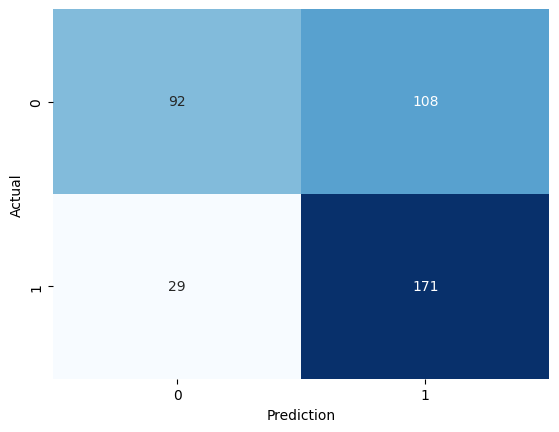

time: 195 ms (started: 2024-07-01 06:54:37 +00:00)


In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
def print_metrics(y_true, y_pred, aver='macro'):
    print("accuracy:", accuracy_score(y_true, y_pred))
    print("recall_score:", recall_score(y_true, y_pred, average = aver))
    print("precision_score:", precision_score(y_true, y_pred, average = aver))
    print("f1_score:", f1_score(y_true, y_pred, average = aver))
    cfm = confusion_matrix(y_true, y_pred)
    s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt = 'd', cbar=False)
    s.set(xlabel='Prediction', ylabel='Actual')
    plt.show()
print_metrics(y_test, y_pred, aver='macro')

In [42]:
wrong_data = np.where(y_test != y_pred)[0]
wrong_len = pd.Series(wrong_data).value_counts().sum()

time: 16.4 ms (started: 2024-07-01 06:54:38 +00:00)


In [44]:
wrong_data = np.random.randint(wrong_len, size = 25)

fig = plt.figure(figsize = (12, 12))
for i, idx in enumerate(wrong_data):
    plt.subplot(5, 5, i+1) # 5*5, 1번부터
    plt.imshow(X_test[idx], cmap = 'gray') # color map
    plt.axis('off') # 축을 지움
    plt.title(f'pred:{y_pred[idx]}({y_test[idx]})') # 정답값
fig.tight_layout() # 보기 좋게 변경
plt.show()

Output hidden; open in https://colab.research.google.com to view.